<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 595438 entries, 0 to 595437
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   shrid2      595438 non-null  object  
 1   pc11_id     594139 non-null  object  
 2   n           594139 non-null  float64 
 3   geometry_t  594139 non-null  object  
 4   polysource  595438 non-null  object  
 5   n_ncontig   1299 non-null    float64 
 6   maxdist_km  1299 non-null    float64 
 7   geometry    595438 non-null  geometry
dtypes: float64(3), geometry(1), object(4)
memory usage: 36.3+ MB
None
                   shrid2 pc11_id    n geometry_t              polysource  \
0  11-01-001-00001-000001  000001  1.0    Polygon  1 shrid = 1 pc polygon   
1  11-01-001-00001-000002  000002  1.0    Polygon  1 shrid = 1 pc polygon   
2  11-01-001-00001-000005  000005  1.0    Polygon  1 shrid = 1 pc polygon   
3  11-01-001-00001-000006  000006  1.0    Polygon  1 shrid = 1 pc polygon

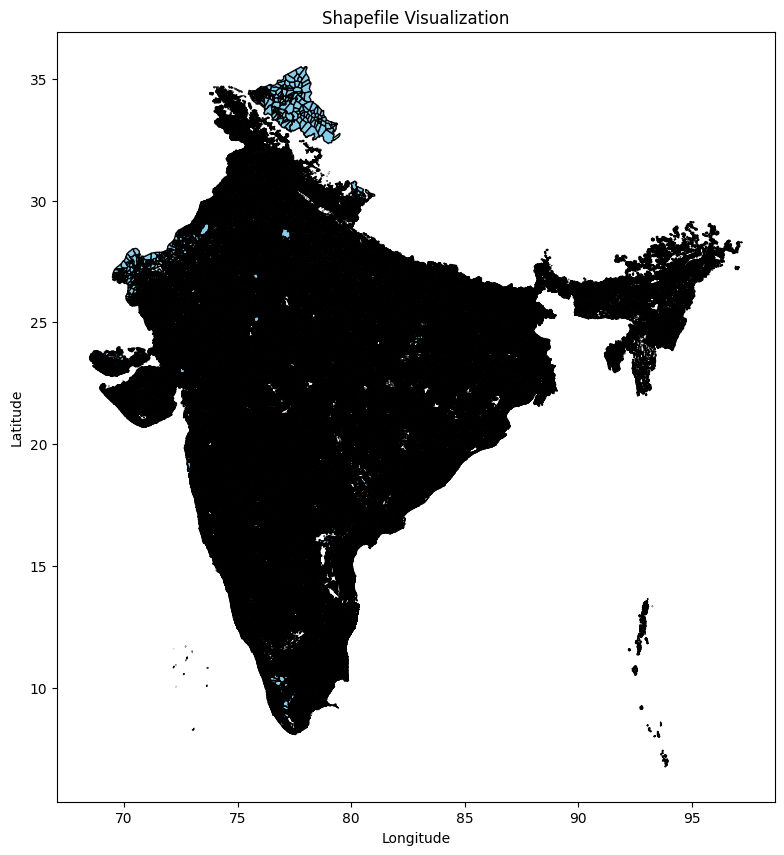

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Path to the shapefile
shapefile_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/03_shapefiles/shrug-shrid-poly-shp/shrid2_open.shp"

# Load the shapefile
shapefile_data = gpd.read_file(shapefile_path)

# Display basic information about the shapefile
print(shapefile_data.info())

# Preview the first few rows
print(shapefile_data.head())

# Plot the shapefile
shapefile_data.plot(figsize=(10, 10), edgecolor='black', color='skyblue')
plt.title("Shapefile Visualization")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


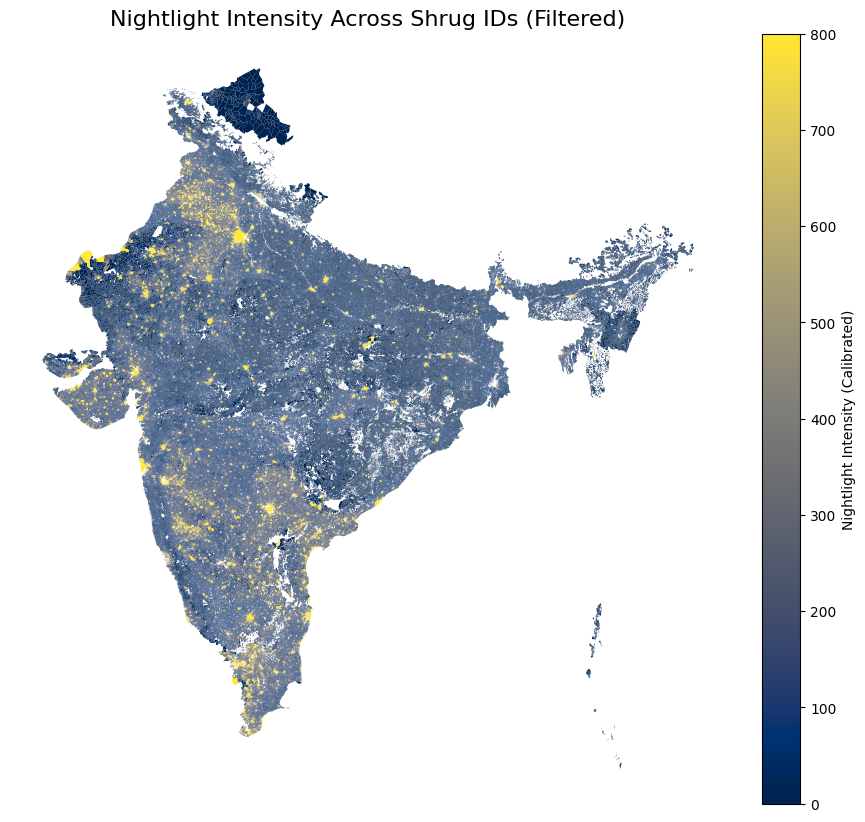

In [2]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm

# Paths to the shapefile and dataset
shapefile_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/03_shapefiles/shrug-shrid-poly-shp/shrid2_open.shp"
dataset_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/02_processed/secc_combined_updated.csv"

# Output path for the map
output_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/05_reports/maps/nightlights.png"

# Load the shapefile
shapefile = gpd.read_file(shapefile_path)

# Load the dataset
dataset = pd.read_csv(dataset_path)

# Merge the shapefile and dataset on the common column 'shrid2'
shapefile["shrid2"] = shapefile["shrid2"].astype(str)
dataset["shrid2"] = dataset["shrid2"].astype(str)
merged = shapefile.merge(dataset, on="shrid2")

# Convert merged data to a GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged, geometry="geometry")

# Plot the nightlight map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Create a normalized color scale with a cap at 800
vmin, vmax = 0, 1000
norm = TwoSlopeNorm(vmin=vmin, vcenter=400, vmax=800)  # Adjust vcenter as needed for your data

# Create a color map based on dmsp_total_light
cmap = "cividis"  # You can change this to other colormaps like 'plasma', 'cividis', 'viridis', etc.

# Plot the data
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_gdf.plot(
    column="dmsp_total_light",
    cmap=cmap,
    norm=norm,
    legend=True,
    ax=ax,
    cax=cax,
    legend_kwds={"label": "Nightlight Intensity (Calibrated)"}
)

# Add titles and labels
ax.set_title("Nightlight Intensity Across Shrug IDs (Filtered)", fontsize=16)
ax.set_axis_off()

# Save the plot as a PNG file
plt.savefig(output_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


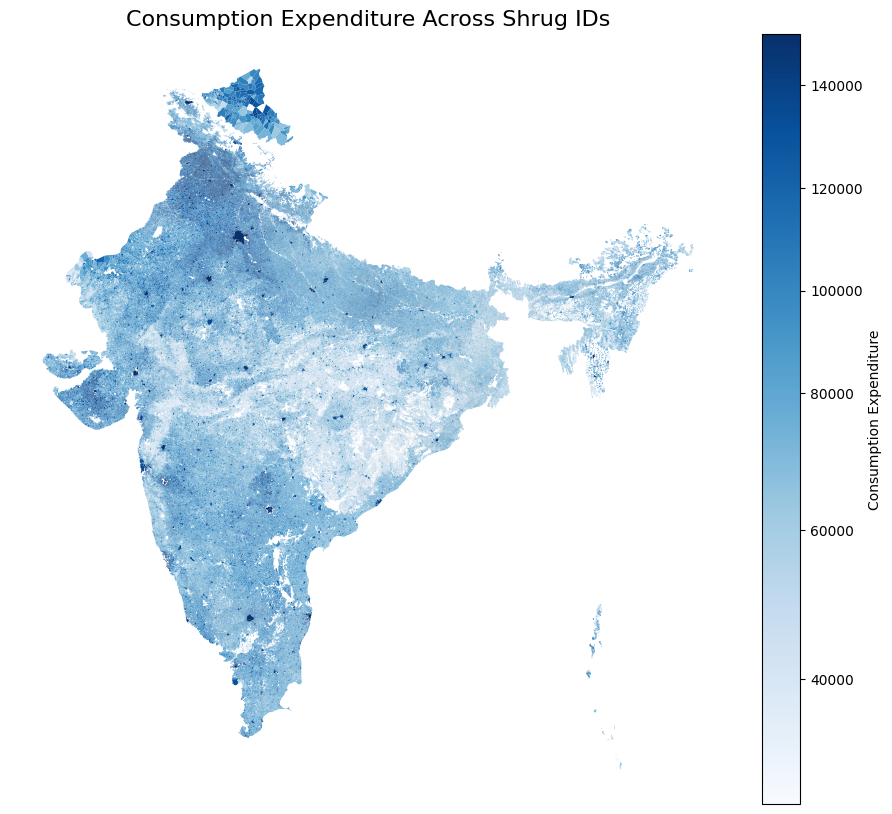

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import TwoSlopeNorm

# Paths to the shapefile and dataset
shapefile_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/03_shapefiles/shrug-shrid-poly-shp/shrid2_open.shp"
dataset_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/02_processed/secc_combined_updated.csv"

# Output path for the map
output_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/05_reports/maps/cons_ineq.png"

# Load the shapefile
shapefile = gpd.read_file(shapefile_path)

# Load the dataset
dataset = pd.read_csv(dataset_path)

# Merge the shapefile and dataset on the common column 'shrid2'
shapefile["shrid2"] = shapefile["shrid2"].astype(str)
dataset["shrid2"] = dataset["shrid2"].astype(str)
merged = shapefile.merge(dataset, on="shrid2")

# Convert merged data to a GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged, geometry="geometry")

# Plot the consumption expenditure map
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# Define normalization for values between 23,203.48 and 150,000
vmin, vmax = 23203.48, 150000
norm = TwoSlopeNorm(vmin=vmin, vcenter=75000, vmax=vmax)  # Adjust vcenter as needed

# Create a single-color scheme (Blues) for secc_cons
cmap = "Blues"  # Single-color scheme for a cohesive look

# Plot the data
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

merged_gdf.plot(
    column="secc_cons",
    cmap=cmap,
    norm=norm,
    legend=True,
    ax=ax,
    cax=cax,
    legend_kwds={"label": "Consumption Expenditure"}
)

# Add titles and labels
ax.set_title("Consumption Expenditure Across Shrug IDs", fontsize=16)
ax.set_axis_off()

# Save the plot as a PNG file
plt.savefig(output_path, dpi=300, bbox_inches="tight")

# Show the plot
plt.show()


In [1]:
import geopandas as gpd
import pandas as pd

# Paths to files
shapefile_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/03_shapefiles/shrug-shrid-poly-shp/shrid2_open.shp"
dataset_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/02_processed/secc_combined_updated.csv"
output_html_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/04_dashboard/assets/nightlights.html"

# Load the data
shapefile = gpd.read_file(shapefile_path)
dataset = pd.read_csv(dataset_path)

# Merge the shapefile and dataset
shapefile["shrid2"] = shapefile["shrid2"].astype(str)
dataset["shrid2"] = dataset["shrid2"].astype(str)
merged = shapefile.merge(dataset, on="shrid2")

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged, geometry="geometry")

# Create an interactive map using geopandas.explore()
m = merged_gdf.explore(
    column="dmsp_total_light",
    cmap="cividis",
    legend=True,
    legend_kwds={"caption": "Nightlight Intensity"},
)

# Save the map as an HTML file
m.save(output_html_path)

print(f"Interactive map saved at: {output_html_path}")


Interactive map saved at: /Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/04_dashboard/assets/nightlights.html


In [2]:
import geopandas as gpd
import pandas as pd

# Paths to files
shapefile_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/03_shapefiles/shrug-shrid-poly-shp/shrid2_open.shp"
dataset_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/01_data/02_processed/secc_combined_updated.csv"
output_html_path = "/Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/04_dashboard/assets/cons_ineq.html"

# Load the data
shapefile = gpd.read_file(shapefile_path)
dataset = pd.read_csv(dataset_path)

# Merge the shapefile and dataset
shapefile["shrid2"] = shapefile["shrid2"].astype(str)
dataset["shrid2"] = dataset["shrid2"].astype(str)
merged = shapefile.merge(dataset, on="shrid2")

# Convert to GeoDataFrame
merged_gdf = gpd.GeoDataFrame(merged, geometry="geometry")

# Create an interactive map using geopandas.explore()
m = merged_gdf.explore(
    column="secc_cons",
    cmap="Blues",
    legend=True,
    legend_kwds={"caption": "Consumption Expenditure"},
)

# Save the map as an HTML file
m.save(output_html_path)

print(f"Interactive map saved at: {output_html_path}")


Interactive map saved at: /Users/bishmaybarik/Library/CloudStorage/OneDrive-ShivNadarInstitutionofEminence/nightlight_atlas/04_dashboard/assets/cons_ineq.html
